# Moving across camera

In [2]:
import AnalysisHelpers as AH

In [3]:
from importlib import reload
reload(AH);

In [4]:
import numpy as np
from matplotlib.pyplot import *

In [5]:
style.use('dark_background')

### servod ordered

In [217]:
data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
'Data Repository/New Data Repository/2018/March/March 11/Raw Data/AceData_10_Servod_5ms.txt');

In [66]:
avgData = np.zeros((100,64,384))
for i, pic in enumerate(data):
    avgData[int(i/5)] += np.array(pic)
avgData /= 5

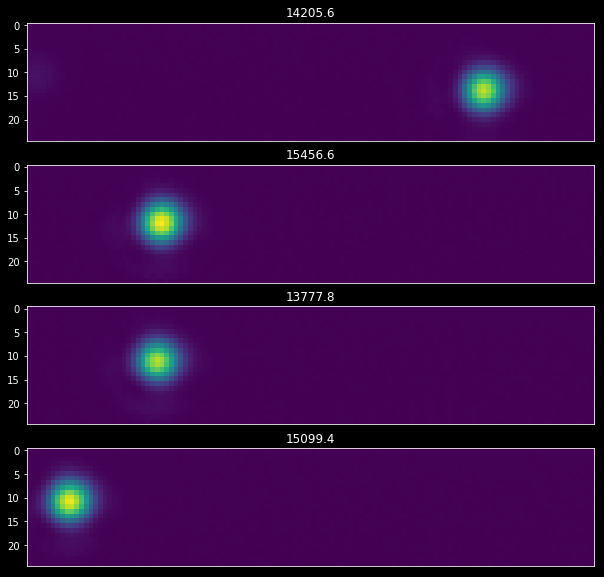

In [133]:
winData = avgData[:,5:30,180:300]
f, ax = subplots(4, 1, figsize=(15,10))
for a in ax:
    a.axes.get_xaxis().set_visible(False)
    #fig.axes.get_yaxis().set_visible(False)
mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
ax[0].set_title(np.sum(winData[0]))
n = 77
ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
ax[1].set_title(np.sum(winData[n]))
n = 78
ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
ax[2].set_title(np.sum(winData[n]))
ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
ax[3].set_title(np.sum(winData[-1]))

In [107]:
integ = np.zeros((100))
for i, pic in enumerate(winData):
    integ[i] = np.sum(pic)

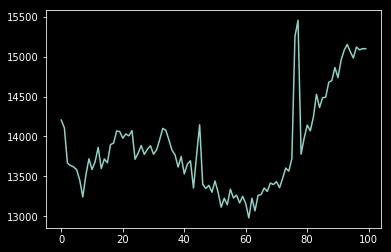

In [108]:
plot(integ)

### unservod ordered

In [140]:
data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
'Data Repository/New Data Repository/2018/March/March 11/Raw Data/AceData_12_Unservod_5ms.txt');

In [141]:
avgData = np.zeros((100,64,384))
for i, pic in enumerate(data):
    avgData[int(i/5)] += np.array(pic)
avgData /= 5

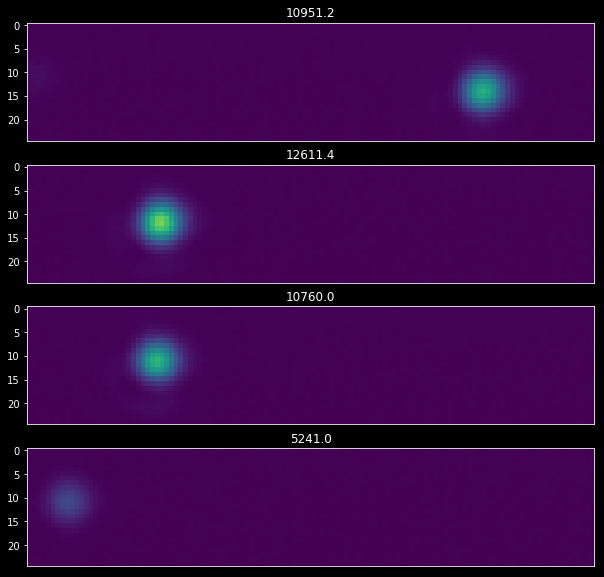

In [142]:
winData = avgData[:,5:30,180:300]
f, ax = subplots(4, 1, figsize=(15,10))
for a in ax:
    a.axes.get_xaxis().set_visible(False)
    #fig.axes.get_yaxis().set_visible(False)
mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
ax[0].set_title(np.sum(winData[0]))
n = 77
ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
ax[1].set_title(np.sum(winData[n]))
n = 78
ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
ax[2].set_title(np.sum(winData[n]))
ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
ax[3].set_title(np.sum(winData[-1]))

In [143]:
integ = np.zeros((100))
for i, pic in enumerate(winData):
    integ[i] = np.sum(pic)

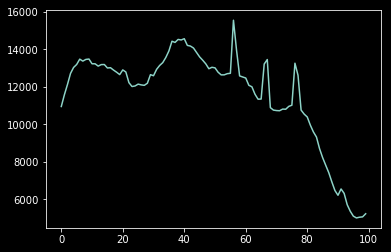

In [144]:
plot(integ)

## Randomized Pics

### func def

In [209]:
def analyzeMoveData(aceName, fileNum, showTweezerImages=False):
    data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
                                 + 'Data Repository/New Data Repository/2018/March/March 11/Raw Data/'
                                 + aceName);
    path = ('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/Data Repository/'
            + 'New Data Repository/2018/March/March 11/Raw Data/data_' + str(fileNum) + '.h5')
    f = AH.openHDF5(path)
    _, key = AH.getKeyFromHDF5(f)
    avgData = np.zeros((100,64,384))
    for i, pic in enumerate(data):
        avgData[int(i/5)] += np.array(pic)
    avgData /= 5
    orderedData, key, _ = AH.orderData(avgData, key)
    winData = orderedData[:,5:30,180:300]
    if showTweezerImages:
        f, ax = subplots(4, 1, figsize=(15,10))
        for a in ax:
            a.axes.get_xaxis().set_visible(False)
        mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
        ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
        ax[0].set_title(np.sum(winData[0]))
        n = 35
        ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
        ax[1].set_title(np.sum(winData[n]))
        n = 78
        ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
        ax[2].set_title(np.sum(winData[n]))
        ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
        ax[3].set_title(np.sum(winData[-1]))
    integ = np.zeros((100))
    for i, pic in enumerate(winData):
        integ[i] = np.sum(pic)
    plot(integ)

### Analysis of data from sunday

Clearly I'm going to actually need to average stuff

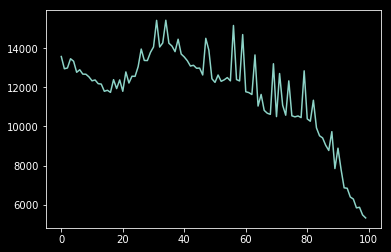

In [210]:
analyzeMoveData('AceData_15_Unservod_randomized_1ms.txt', 15)

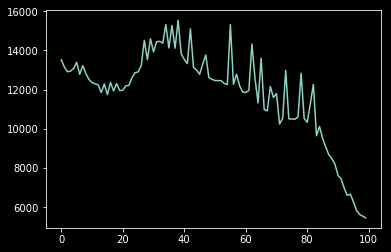

In [211]:
analyzeMoveData('AceData_16_Unservod_randomized_1ms.txt', 16)

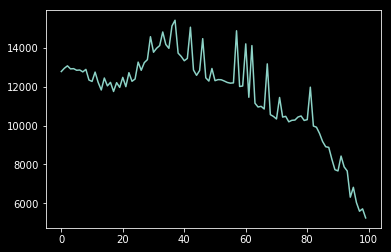

In [212]:
analyzeMoveData('AceData_17_Unservod_randomized_1ms.txt', 17)

### Analysis / Averaging of data from Tuesday

In [239]:
aceName = 'Moving_2.txt'
fileNum = 2
data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
                             + 'Data Repository/New Data Repository/2018/March/March 13/Raw Data/'
                             + aceName);
path = ('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/Data Repository/'
        + 'New Data Repository/2018/March/March 13/Raw Data/data_moving_' + str(fileNum) + '.h5')
f = AH.openHDF5(path)
print('opened...')
_, key = AH.getKeyFromHDF5(f)

opened...


In [240]:
avgData = np.zeros((100,data.shape[1],data.shape[2]))
for i, pic in enumerate(data):
    avgData[int(i/5)] += np.array(pic)
avgData /= 5
orderedData, key, _ = AH.orderData(avgData, key)

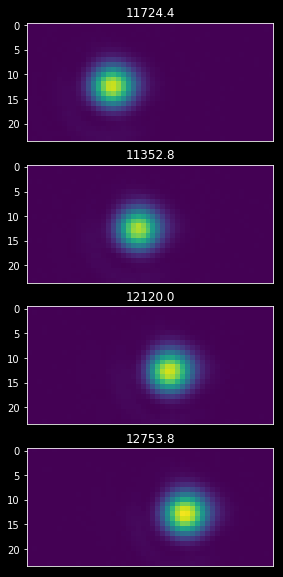

In [247]:
winData = orderedData[:,148:172,210:260]
if True:
    f, ax = subplots(4, 1, figsize=(15,10))
    for a in ax:
        a.axes.get_xaxis().set_visible(False)
    mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
    ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
    ax[0].set_title(np.sum(winData[0]))
    n = 35
    ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
    ax[1].set_title(np.sum(winData[n]))
    n = 78
    ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
    ax[2].set_title(np.sum(winData[n]))
    ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
    ax[3].set_title(np.sum(winData[-1]))
integ = np.zeros((100))
for i, pic in enumerate(winData):
    integ[i] = np.sum(pic)

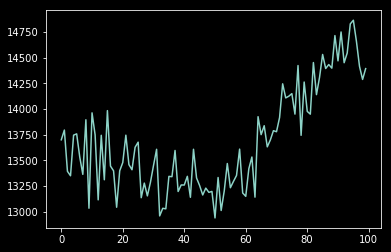

In [235]:
plot(integ)

In [12]:
def analyzeMoveData(aceName, fileNum, showTweezerImages=False):
    data = AH.loadCompoundBasler('Data/' + aceName);
    path = 'Data/data_moving_' + str(fileNum) + '.h5'
    f = AH.openHDF5(path)
    _, key = AH.getKeyFromHDF5(f)
    avgData = np.zeros((100,data.shape[1],data.shape[2]))
    for i, pic in enumerate(data):
        avgData[int(i/5)] += np.array(pic)
    avgData /= 5
    orderedData, key, _ = AH.orderData(avgData, key)
    winData = orderedData[:,148:172,210:260]
    if showTweezerImages:
        f, ax = subplots(4, 1, figsize=(15,10))
        for a in ax:
            a.axes.get_xaxis().set_visible(False)
        mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
        ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
        ax[0].set_title(np.sum(winData[0]))
        n = 35
        ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
        ax[1].set_title(np.sum(winData[n]))
        n = 78
        ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
        ax[2].set_title(np.sum(winData[n]))
        ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
        ax[3].set_title(np.sum(winData[-1]))
    integ = np.zeros((100))
    for i, pic in enumerate(winData):
        integ[i] = np.sum(pic)
    plot(integ)
    return integ

0
1
2
3
4
5
6
7
8
9
10


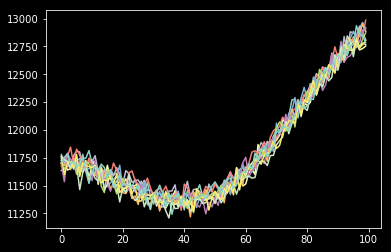

In [13]:
allInteg = []
for num in range(11):
    print(num)
    allInteg.append(analyzeMoveData('Moving_' + str(num+1) + '.txt', num+1, showTweezerImages=False))

...

In [14]:
avgInteg = np.zeros(allInteg[0].shape)
for i in allInteg:
    avgInteg += i
print(len(allInteg))
avgInteg /= len(allInteg)

11


In [16]:
import plotly.offline as pltly
import plotly.graph_objs as go

In [17]:
pltly.init_notebook_mode(connected=True)

In [18]:
pltly.iplot([go.Scatter(x=list(range(len(avgInteg))), y=avgInteg)])

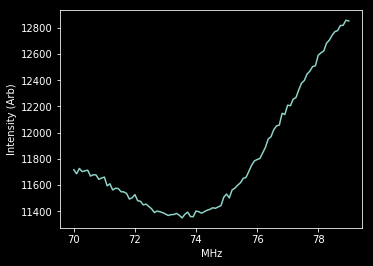

In [28]:
plot(np.linspace(70,79,len(avgd)), avgInteg)
xlabel('MHz')
ylabel('Intensity (Arb)')
subplots_adjust(left=0.2)
savefig('normal-move.png')

### larger distance

In [277]:
aceName = 'AceData_101.txt'
fileNum = 1
data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
                             + 'Data Repository/New Data Repository/2018/March/March 13/Raw Data/'
                             + aceName);
path = ('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/Data Repository/'
        + 'New Data Repository/2018/March/March 13/Raw Data/data_' + str(fileNum) + '.h5')
f = AH.openHDF5(path)
_, key = AH.getKeyFromHDF5(f)
avgData = np.zeros((100,data.shape[1],data.shape[2]))
for i, pic in enumerate(data):
    avgData[int(i/5)] += np.array(pic)
avgData /= 5
orderedData, key, _ = AH.orderData(avgData, key)

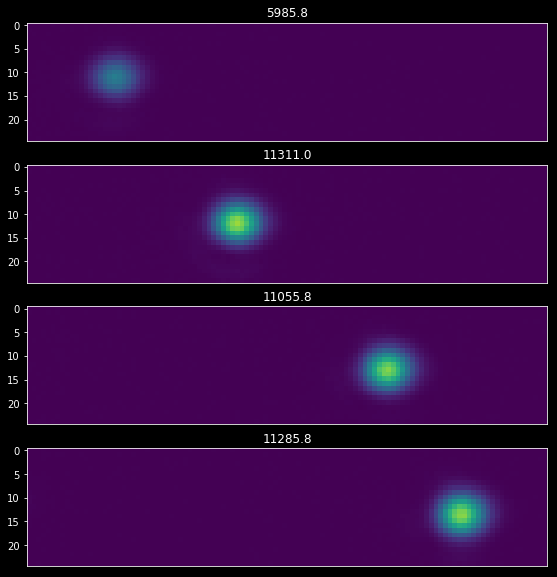

In [289]:
winData = orderedData[:,53:78,70:180]
if True:
    f, ax = subplots(4, 1, figsize=(15,10))
    for a in ax:
        a.axes.get_xaxis().set_visible(False)
    mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
    ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
    ax[0].set_title(np.sum(winData[0]))
    n = 35
    ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
    ax[1].set_title(np.sum(winData[n]))
    n = 78
    ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
    ax[2].set_title(np.sum(winData[n]))
    ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
    ax[3].set_title(np.sum(winData[-1]))
integ = np.zeros((100))
for i, pic in enumerate(winData):
    integ[i] = np.sum(pic)

In [11]:
def analyzeMoveData(aceName, fileNum, showTweezerImages=False):
    
    #data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
    #                             + 'Data Repository/New Data Repository/2018/March/March 13/Raw Data/'
    #                             + aceName);
    data = AH.loadCompoundBasler('Data/' + aceName);
    path = ('Data/moving_' + str(fileNum) + '.h5')
    f = AH.openHDF5(path)
    _, key = AH.getKeyFromHDF5(f)
    avgData = np.zeros((100,data.shape[1],data.shape[2]))
    for i, pic in enumerate(data):
        avgData[int(i/5)] += np.array(pic)
    avgData /= 5
    orderedData, key, _ = AH.orderData(avgData, key)
    winData = orderedData[:,53:78,70:180]
    if showTweezerImages:
        f, ax = subplots(4, 1, figsize=(15,10))
        for a in ax:
            a.axes.get_xaxis().set_visible(False)
        mini, maxi = np.min(winData.flatten()), np.max(winData.flatten())
        ax[0].imshow(winData[0], vmin=mini, vmax = maxi)
        ax[0].set_title(np.sum(winData[0]))
        n = 35
        ax[1].imshow(winData[n], vmin=mini, vmax = maxi)
        ax[1].set_title(np.sum(winData[n]))
        n = 78
        ax[2].imshow(winData[n], vmin=mini, vmax = maxi)
        ax[2].set_title(np.sum(winData[n]))
        ax[3].imshow(winData[-1], vmin=mini, vmax = maxi)
        ax[3].set_title(np.sum(winData[-1]))
    integ = np.zeros((100))
    for i, pic in enumerate(winData):
        integ[i] = np.sum(pic)
    plot(integ)
    return integ

Still 1ms move

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


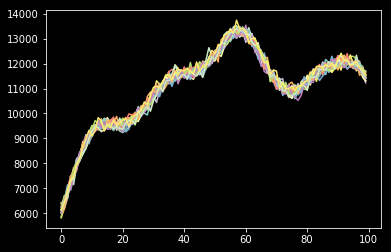

In [7]:
allInteg = []
for num in range(9):
    print(num)
    allInteg.append(analyzeMoveData('AceData_10' + str(num+1) + '.txt', num+1, showTweezerImages=False))
for num in range(9,20):
    print(num)
    allInteg.append(analyzeMoveData('AceData_1' + str(num+1) + '.txt', num+1, showTweezerImages=False))

In [8]:
avgd = allInteg[0]
for i, dat in enumerate(allInteg):
    if i == 0:
        continue
    avgd += dat

In [314]:
pltly.iplot([go.Scatter(x=list(range(len(avgd))), y=avgd)])

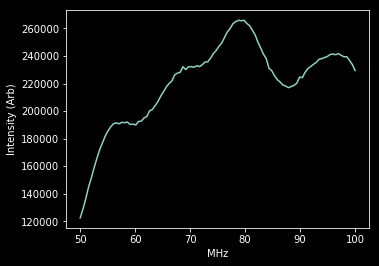

In [24]:
plot(np.linspace(50,100,len(avgd)), avgd)
xlabel('MHz')
ylabel('Intensity (Arb)')
subplots_adjust(left=0.2) 
savefig('largerange.png')

# Array Analysis

## Initial Image Loading

In [16]:
import AnalysisHelpers as AH
import numpy as np
from matplotlib.pyplot import *
style.use('dark_background')

In [710]:
from fitters import gaussian_2d
from importlib import reload
reload(gaussian_2d);
from fitters import arb_2d_gaussian_sum
reload(arb_2d_gaussian_sum)
import scipy.optimize as opt
from numpy import array as arr
reload(opt);

## Original Images

In [293]:
data = AH.loadCompoundBasler('//jilafile.colorado.edu/scratch/regal/common/LabData/Quantum Gas Assembly/'
'Data Repository/New Data Repository/2018/March/March 11/Raw Data/AceDataArray.txt');

In [294]:
avgData = np.zeros((data.shape[1], data.shape[2]))
for pic in data:
    avgData += pic
avgData /= data.shape[0]

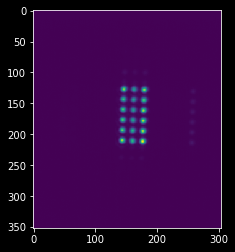

In [295]:
imshow(avgData)

### % in main tweezers

Efficiency: 0.92224109793


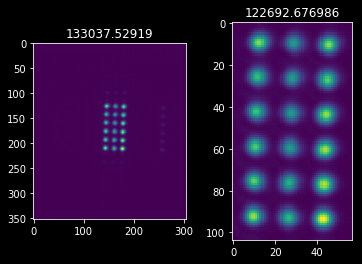

In [305]:
f, ax = subplots(1,2);
bgSub = avgData - 0.5387387
windowData = bgSub[118:222, 134:191]
ax[0].imshow(bgSub)
ax[0].set_title(np.sum(bgSub))
ax[1].imshow(windowData)
im = ax[1].set_title(np.sum(windowData))
print('Efficiency: ' + str(np.sum(windowData)/np.sum(bgSub)))

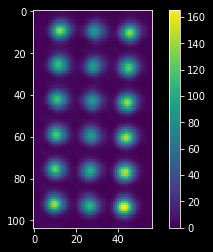

In [434]:
imshow(windowData)
colorbar()

### Fitting main tweezers

In [711]:
x = np.arange(57)
y = np.arange(104)
xx, yy = np.meshgrid(x,y)
# 0 for offset
params = [0]
for i in range(18):
    params.append(135 - 30*(i%3==1) + 15*(i%3==2) + 20 * (int(i/3)==5))
    params.append(( 12 + 17 * (i % 3)) - i/6)
    params.append(9 + 13.5 * int(i/3) + 2.98*i/3)
    params.append(3)
    params.append(3)
res = arb_2d_gaussian_sum.f_raw((xx,yy),  *arr(params).flatten());

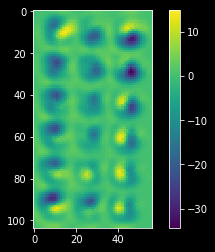

In [712]:
imshow(res)
imshow(windowData-res)
colorbar()

In [582]:
windowData = np.array(windowData, dtype='float64')

In [713]:
fitParams, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (xx, yy), windowData.ravel(), p0=params)

In [714]:
res = arb_2d_gaussian_sum.f_raw((xx,yy), *fitParams);

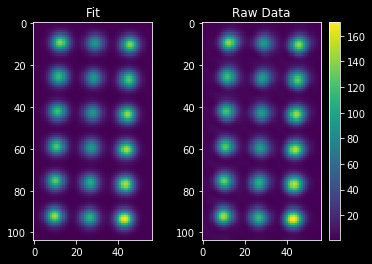

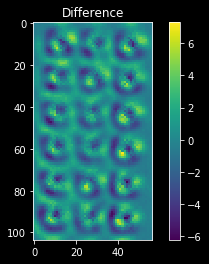

In [783]:
f, ax = subplots(1,2)
a = ax[0].imshow(res)
colorbar(a)
ax[0].set_title('Fit')
ax[1].imshow(windowData)
ax[1].set_title('Raw Data')
savefig('Fit-vs-Raw.png', dpi=200)
figure()
imshow(windowData-res)
title('Difference')
colorbar()
savefig('Difference-between-fit-and-raw.png', dpi=100)

In [721]:
shapedParams = np.reshape(fitParams[1:], (6,3,5))

In [722]:
amps = np.zeros((6,3))
sig_x = np.zeros((6,3))
sig_y = np.zeros((6,3))
for i, row in enumerate(shapedParams):
    for j, elem in enumerate(row):
        amps[i][j] = elem[0]
        sig_x[i][j] = elem[3]
        sig_y[i][j] = elem[4]

In [773]:
from Miscellaneous import round_sig

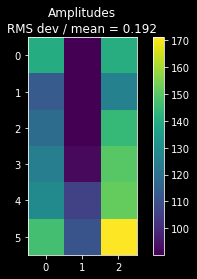

In [778]:
imshow(amps)
colorbar()
title('Amplitudes\nRMS dev / mean = ' + str(round_sig(np.std(amps)/np.mean(amps))))
savefig('Fit-Amplitudes.png')

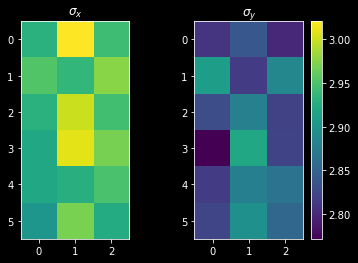

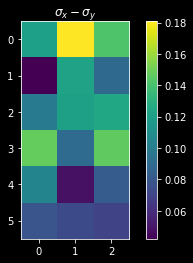

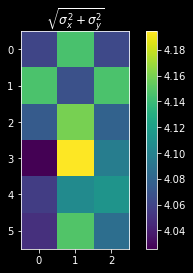

In [779]:
f, ax = subplots(1,2)
vma = np.max(list(sig_x) + list(sig_y))
vmi = np.min(list(sig_x) + list(sig_y))
a = ax[0].imshow(sig_x, vmax=vma, vmin=vmi)
colorbar(a)
ax[0].set_title(r'$\sigma_x$')
ax[1].imshow(sig_y, vmax=vma, vmin=vmi)
ax[1].set_title(r'$\sigma_y$')
savefig('Fit-Waists.png')
figure()
imshow(sig_x-sig_y)
colorbar()
title('$\sigma_x-\sigma_y$')
savefig('Waist-Difference.png')
figure()
imshow(np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('$\sqrt{\sigma_x^2+\sigma_y^2}$')
savefig('rms-waist.png')

## 3x6 second (normal)

In [2]:
import AnalysisHelpers as AH

In [7]:
import numpy as np

In [206]:
data = AH.loadCompoundBasler('AceData_0_3x6_normal.txt');

In [207]:
avgData = np.zeros((data.shape[1], data.shape[2]))
for pic in data:
    avgData += pic
avgData /= data.shape[0]

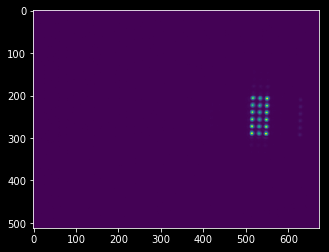

In [208]:
imshow(avgData)
savefig('AceData_0_3x6_normal.png')

### % in main tweezers

0.862762222222


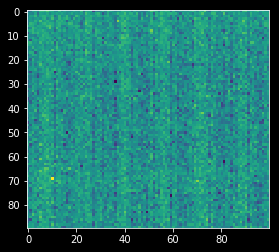

In [154]:
print(np.mean(avgData[10:100,:100]))
imshow(avgData[10:100,:100])

Efficiency: 0.897242574491


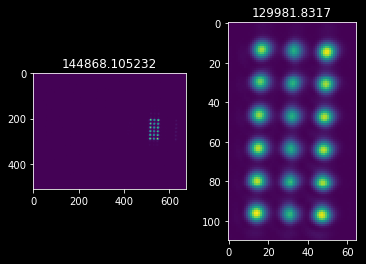

In [155]:
f, ax = subplots(1,2);
bgSub = avgData - 0.862762
windowData = bgSub[193:303, 500:565]
ax[0].imshow(bgSub)
ax[0].set_title(np.sum(bgSub))
ax[1].imshow(windowData)
im = ax[1].set_title(np.sum(windowData))
print('Efficiency: ' + str(np.sum(windowData)/np.sum(bgSub)))

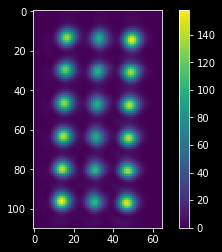

In [156]:
imshow(windowData)
colorbar()

### Fitting main tweezers

In [157]:
from fitters import arb_2d_gaussian_sum
from numpy import array as arr

In [158]:
x = np.arange(windowData.shape[1])
y = np.arange(windowData.shape[0])
xx, yy = np.meshgrid(x,y)
# 0 for offset
params = [0]
for i in range(18):
    params.append(135 - 30*(i%3==1) + 15*(i%3==2) + 20 * (int(i/3)==5))
    params.append( 16 + 17 * (i % 3) - i/6 )
    params.append( 13 + 13.5 * int(i/3) + 2.98*i/3 )
    params.append( 3 )
    params.append( 3 )
res = arb_2d_gaussian_sum.f_raw((xx,yy),  *arr(params).flatten());

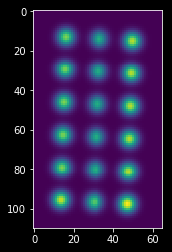

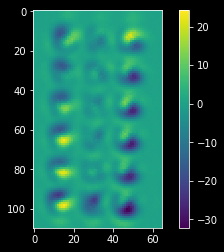

In [159]:
imshow(res)
figure()
imshow(windowData-res)
colorbar()

In [160]:
windowData = np.array(windowData, dtype='float64')

In [161]:
import scipy.optimize as opt

In [162]:
fitParams, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (xx, yy), windowData.ravel(), p0=params)

In [163]:
res = arb_2d_gaussian_sum.f_raw((xx,yy), *fitParams);

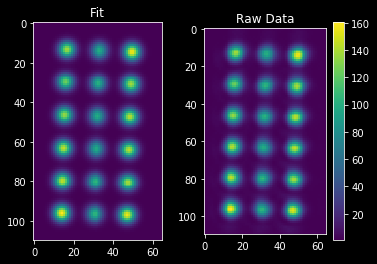

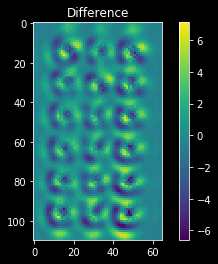

In [164]:
f, ax = subplots(1,2)
a = ax[0].imshow(res)
colorbar(a)
ax[0].set_title('Fit')
ax[1].imshow(windowData)
ax[1].set_title('Raw Data')
savefig('Fit-vs-Raw.png', dpi=200)
figure()
imshow(windowData-res)
title('Difference')
colorbar()
savefig('Difference-between-fit-and-raw.png', dpi=100)

### Results

In [165]:
from Miscellaneous import round_sig

In [166]:
shapedParams = np.reshape(fitParams[1:], (6,3,5))

In [167]:
amps = np.zeros((6,3))
sig_x = np.zeros((6,3))
sig_y = np.zeros((6,3))
for i, row in enumerate(shapedParams):
    for j, elem in enumerate(row):
        amps[i][j] = elem[0]
        sig_x[i][j] = elem[3]
        sig_y[i][j] = elem[4]

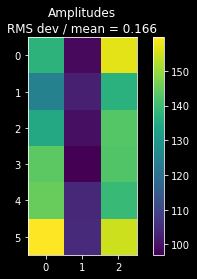

In [168]:
imshow(amps)
colorbar()
title('Amplitudes\nRMS dev / mean = ' + str(round_sig(np.std(amps)/np.mean(amps))))
savefig('Fit-Amplitudes_3x6_normal.png')

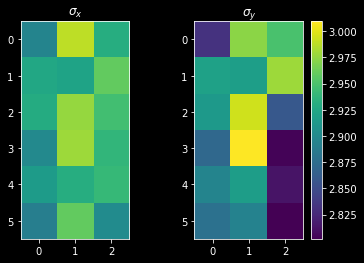

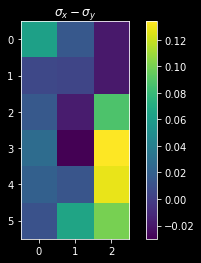

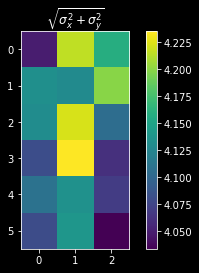

In [169]:
f, ax = subplots(1,2)
vma = np.max(list(sig_x) + list(sig_y))
vmi = np.min(list(sig_x) + list(sig_y))
a = ax[0].imshow(sig_x, vmax=vma, vmin=vmi)
colorbar(a)
ax[0].set_title(r'$\sigma_x$')
ax[1].imshow(sig_y, vmax=vma, vmin=vmi)
ax[1].set_title(r'$\sigma_y$')
savefig('Fit-Waists.png')
figure()
imshow(sig_x-sig_y)
colorbar()
title('$\sigma_x-\sigma_y$')
savefig('Waist-Difference.png')
figure()
imshow(np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('$\sqrt{\sigma_x^2+\sigma_y^2}$')
savefig('rms-waist.png')

## 1x6

In [209]:
data = AH.loadCompoundBasler('AceData_1_1x6.txt');

In [210]:
avgData = np.zeros((data.shape[1], data.shape[2]))
for pic in data:
    avgData += pic
avgData /= data.shape[0]

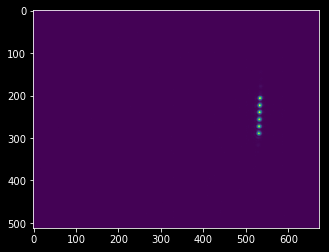

In [211]:
imshow(avgData)
savefig('AceData_1_1x6.png')

### % in main tweezers

0.922488518519


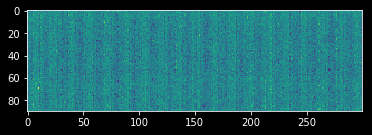

In [173]:
print(np.mean(avgData[10:100,:300]))
imshow(avgData[10:100,:300])

Efficiency: 0.880578863346


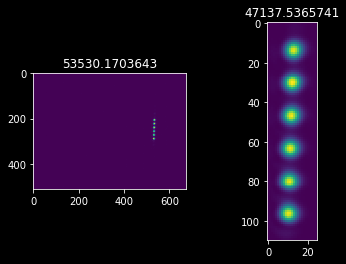

In [174]:
f, ax = subplots(1,2);
bgSub = avgData - 0.922488518519
windowData = bgSub[193:303, 520:545]
ax[0].imshow(bgSub)
ax[0].set_title(np.sum(bgSub))
ax[1].imshow(windowData)
im = ax[1].set_title(np.sum(windowData))
print('Efficiency: ' + str(np.sum(windowData)/np.sum(bgSub)))

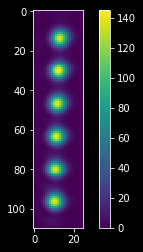

In [175]:
imshow(windowData)
colorbar()

### Fitting main tweezers

In [176]:
from fitters import arb_2d_gaussian_sum
from numpy import array as arr

In [177]:
x = np.arange(windowData.shape[1])
y = np.arange(windowData.shape[0])
xx, yy = np.meshgrid(x,y)
# 0 for offset
params = [0]
numInRow = 1
for i in range(6):
    params.append(135 - 30*(i%numInRow==1) + 15*(i%numInRow==2) + 20 * (int(i/numInRow)==5))
    params.append( 12 + 17 * (i % numInRow) - i/6 )
    params.append( 13 + 13.5 * int(i/numInRow) + 2.98*i/numInRow )
    params.append( 3 )
    params.append( 3 )
res = arb_2d_gaussian_sum.f_raw((xx,yy),  *arr(params).flatten());

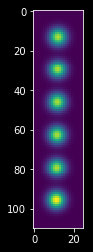

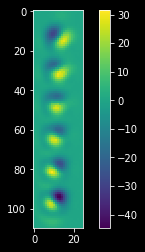

In [178]:
imshow(res)
figure()
imshow(windowData-res)
colorbar()

In [179]:
windowData = np.array(windowData, dtype='float64')

In [180]:
fitParams, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (xx, yy), windowData.ravel(), p0=params)

In [181]:
res = arb_2d_gaussian_sum.f_raw((xx,yy), *fitParams);

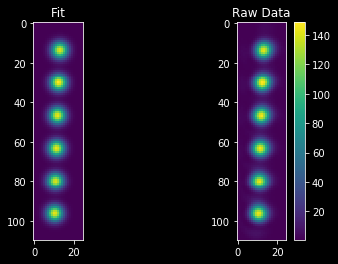

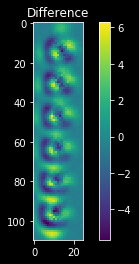

In [182]:
f, ax = subplots(1,2)
a = ax[0].imshow(res)
colorbar(a)
ax[0].set_title('Fit')
ax[1].imshow(windowData)
ax[1].set_title('Raw Data')
savefig('Fit-vs-Raw.png', dpi=200)
figure()
imshow(windowData-res)
title('Difference')
colorbar()
savefig('Difference-between-fit-and-raw.png', dpi=100)

### Results

In [183]:
shapedParams = np.reshape(fitParams[1:], (6,1,5))

In [184]:
amps = np.zeros((6,1))
sig_x = np.zeros((6,1))
sig_y = np.zeros((6,1))
for i, row in enumerate(shapedParams):
    for j, elem in enumerate(row):
        amps[i][j] = elem[0]
        sig_x[i][j] = elem[3]
        sig_y[i][j] = elem[4]

In [185]:
from Miscellaneous import round_sig

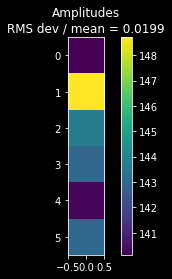

In [186]:
imshow(amps)
colorbar()
title('Amplitudes\nRMS dev / mean = ' + str(round_sig(np.std(amps)/np.mean(amps))))
savefig('Fit-Amplitudes-1x6.png')

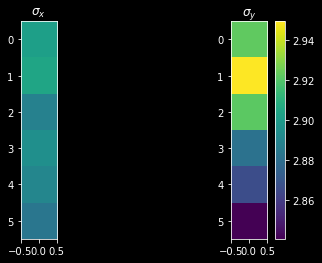

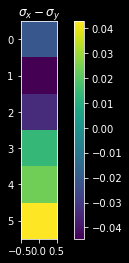

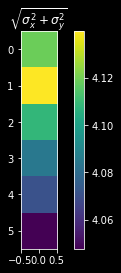

In [187]:
f, ax = subplots(1,2)
vma = np.max(list(sig_x) + list(sig_y))
vmi = np.min(list(sig_x) + list(sig_y))
a = ax[0].imshow(sig_x, vmax=vma, vmin=vmi)
colorbar(a)
ax[0].set_title(r'$\sigma_x$')
ax[1].imshow(sig_y, vmax=vma, vmin=vmi)
ax[1].set_title(r'$\sigma_y$')
savefig('Fit-Waists.png')
figure()
imshow(sig_x-sig_y)
colorbar()
title('$\sigma_x-\sigma_y$')
savefig('Waist-Difference.png')
figure()
imshow(np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('$\sqrt{\sigma_x^2+\sigma_y^2}$')
savefig('rms-waist.png')

## 3x6 Wide

In [212]:
data = AH.loadCompoundBasler('AceData_2_3x6_wide.txt');

In [213]:
avgData = np.zeros((data.shape[1], data.shape[2]))
for pic in data:
    avgData += pic
avgData /= data.shape[0]

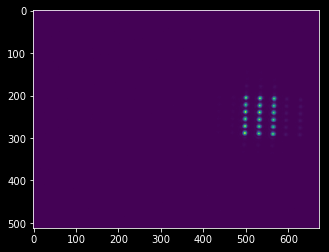

In [214]:
imshow(avgData)
savefig('AceData_2_3x6_wide.png')

### % in main tweezers

0.90790962963


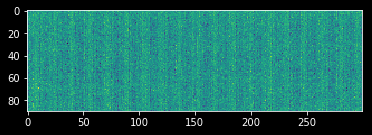

In [191]:
print(np.mean(avgData[10:100,:300]))
imshow(avgData[10:100,:300])

Efficiency: 0.893637192016


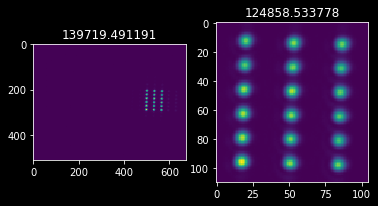

In [192]:
f, ax = subplots(1,2);
bgSub = avgData - 0.90790962963
windowData = bgSub[193:303, 480:585]
ax[0].imshow(bgSub)
ax[0].set_title(np.sum(bgSub))
ax[1].imshow(windowData)
im = ax[1].set_title(np.sum(windowData))
print('Efficiency: ' + str(np.sum(windowData)/np.sum(bgSub)))

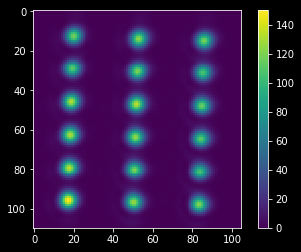

In [193]:
imshow(windowData)
colorbar()

### Fitting main tweezers

In [194]:
from fitters import arb_2d_gaussian_sum
from numpy import array as arr

In [195]:
x = np.arange(windowData.shape[1])
y = np.arange(windowData.shape[0])
xx, yy = np.meshgrid(x,y)
# 0 for offset
params = [0]
numInRow = 3
for i in range(18):
    params.append(135 - 30*(i%numInRow==1) + 15*(i%numInRow==2) + 20 * (int(i/numInRow)==5))
    params.append( 21 + 2*16.5 * (i % numInRow) - i/6 )
    params.append( 13 + 13.5 * int(i/numInRow) + 2.98*i/numInRow )
    params.append( 3 )
    params.append( 3 )
res = arb_2d_gaussian_sum.f_raw((xx,yy),  *arr(params).flatten());

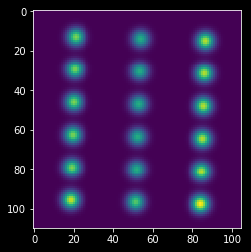

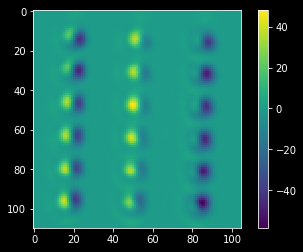

In [196]:
imshow(res)
figure()
imshow(windowData-res)
colorbar()

In [197]:
windowData = np.array(windowData, dtype='float64')

In [198]:
fitParams, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (xx, yy), windowData.ravel(), p0=params)

In [199]:
res = arb_2d_gaussian_sum.f_raw((xx,yy), *fitParams);

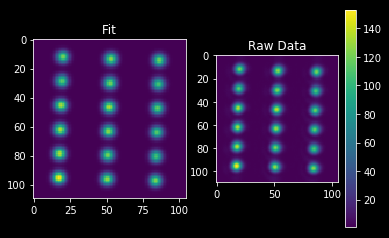

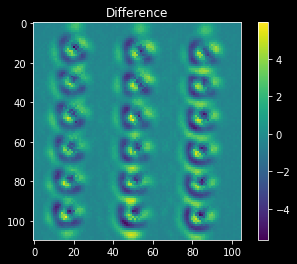

In [200]:
f, ax = subplots(1,2)
a = ax[0].imshow(res)
colorbar(a)
ax[0].set_title('Fit')
ax[1].imshow(windowData)
ax[1].set_title('Raw Data')
savefig('Fit-vs-Raw.png', dpi=200)
figure()
imshow(windowData-res)
title('Difference')
colorbar()
savefig('Difference-between-fit-and-raw.png', dpi=100)

### Results

In [201]:
shapedParams = np.reshape(fitParams[1:], (6,3,5))

In [202]:
amps = np.zeros((6,3))
sig_x = np.zeros((6,3))
sig_y = np.zeros((6,3))
for i, row in enumerate(shapedParams):
    for j, elem in enumerate(row):
        amps[i][j] = elem[0]
        sig_x[i][j] = elem[3]
        sig_y[i][j] = elem[4]

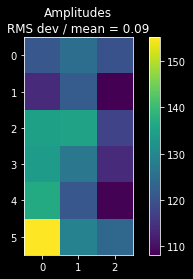

In [203]:
imshow(amps)
colorbar()
title('Amplitudes\nRMS dev / mean = ' + str(round_sig(np.std(amps)/np.mean(amps))))
savefig('Fit-Amplitudes-3x6-wide.png')

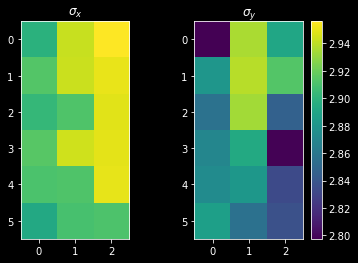

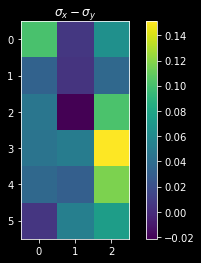

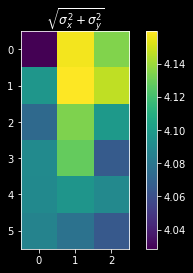

In [204]:
f, ax = subplots(1,2)
vma = np.max(list(sig_x) + list(sig_y))
vmi = np.min(list(sig_x) + list(sig_y))
a = ax[0].imshow(sig_x, vmax=vma, vmin=vmi)
colorbar(a)
ax[0].set_title(r'$\sigma_x$')
ax[1].imshow(sig_y, vmax=vma, vmin=vmi)
ax[1].set_title(r'$\sigma_y$')
savefig('Fit-Waists.png')
figure()
imshow(sig_x-sig_y)
colorbar()
title('$\sigma_x-\sigma_y$')
savefig('Waist-Difference.png')
figure()
imshow(np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('$\sqrt{\sigma_x^2+\sigma_y^2}$')
savefig('rms-waist.png')

## 6x1

### Getting / Testing Phases for arrray...

In [345]:
reload(AH)

<module 'AnalysisHelpers' from 'C:\\Users\\Mark-Brown\\Documents\\Analysis-Code\\AnalysisHelpers.py'>

xFreqs [49, 58, 67, 76, 85, 94]
xAmps [ 1.  1.  1.  1.  1.  1.]
X-Phases [ 4.49784982  0.          2.75738823  5.38656791  1.07754897  3.61111283]
yFreqs [74.5]
yAmps [ 1.]
Y-Phases [ 0.34850649]


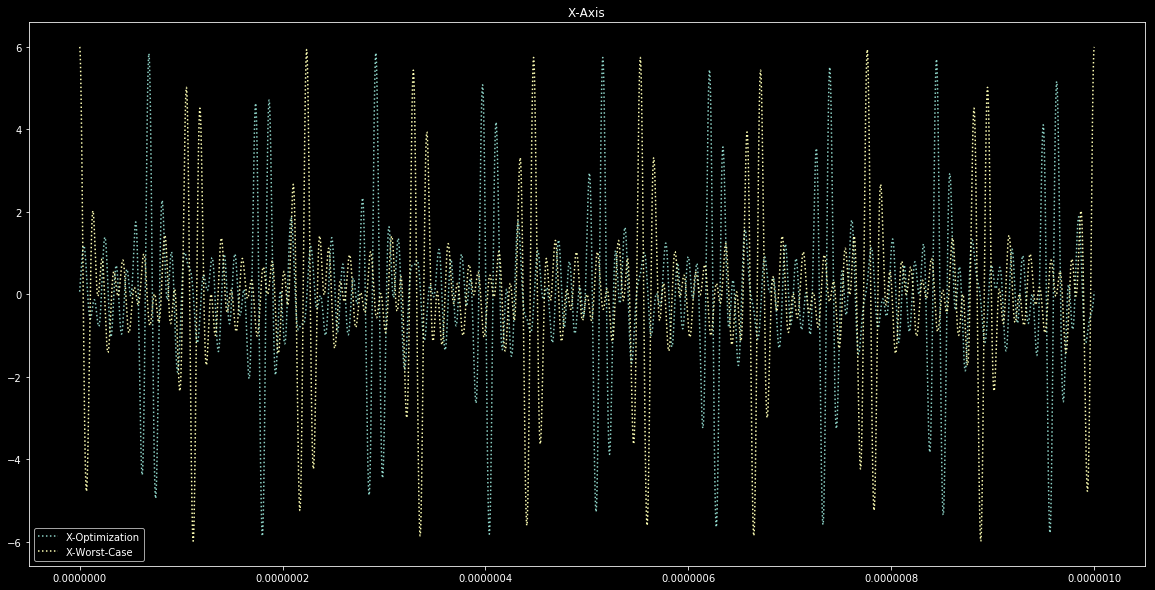

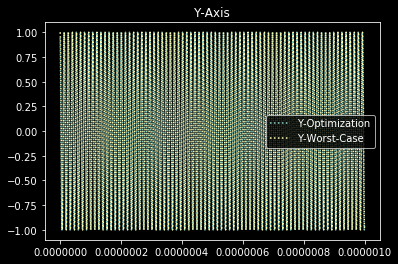

In [346]:
figure(figsize=(20,10))
xpts, yptsx_std_stupid, yptsy_std_stupid = AH.maximizeAomPerformance(49, 74.5, 9, 6, 1,
        iterations=10, optimizeBiases=False, metric='std', paperGuess=False );

xFreqs [49, 58, 67, 76, 85, 94]
xAmps [ 1.60159006  0.72256714  0.67790782  0.67606629  0.84459182  1.47727687]
X-Phases [ 0.39215781  0.58232846  2.32492721  4.28354534  6.16733993  3.84334802]
yFreqs [74.5]
yAmps [ 1.]
Y-Phases [ 0.1531603]


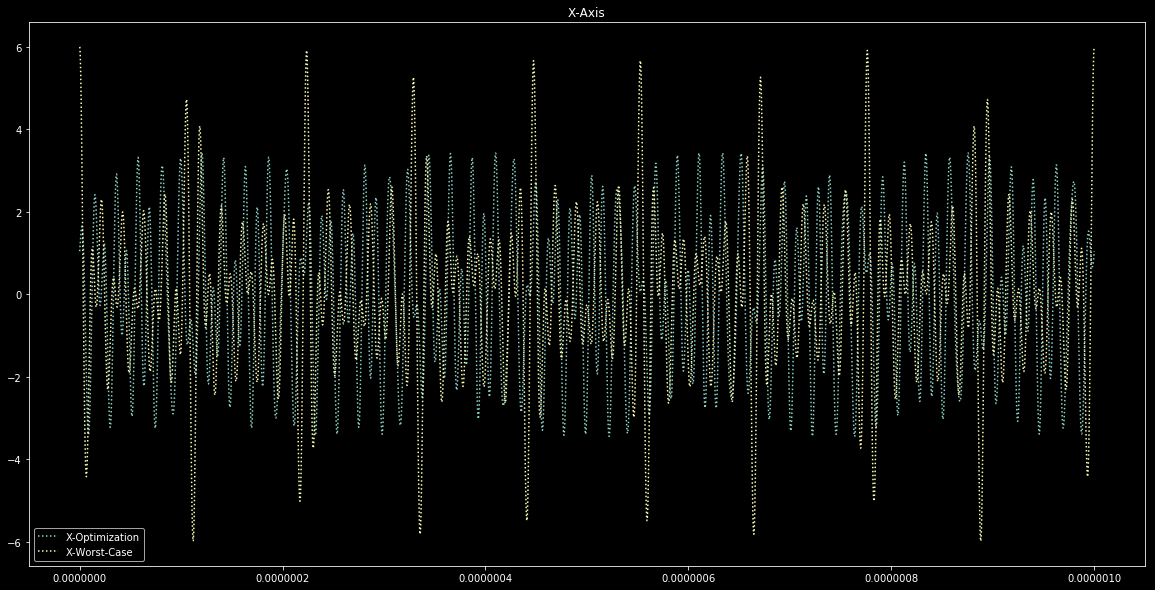

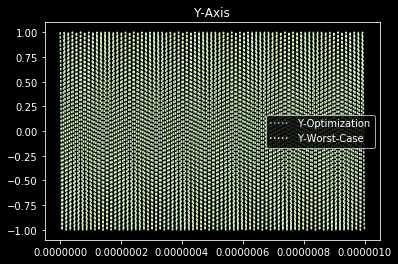

In [354]:
figure(figsize=(20,10))
xpts, yptsx_std, yptsy_std = AH.maximizeAomPerformance(49, 74.5, 9, 6, 1);

xFreqs [49, 58, 67, 76, 85, 94]
xAmps [ 1.  1.  1.  1.  1.  1.]
X-Phases [ 0.2607361   2.78416468  3.27049318  3.18829388  6.06803438  6.28318531]
yFreqs [74.5]
yAmps [ 1.]
Y-Phases [ 0.24550793]


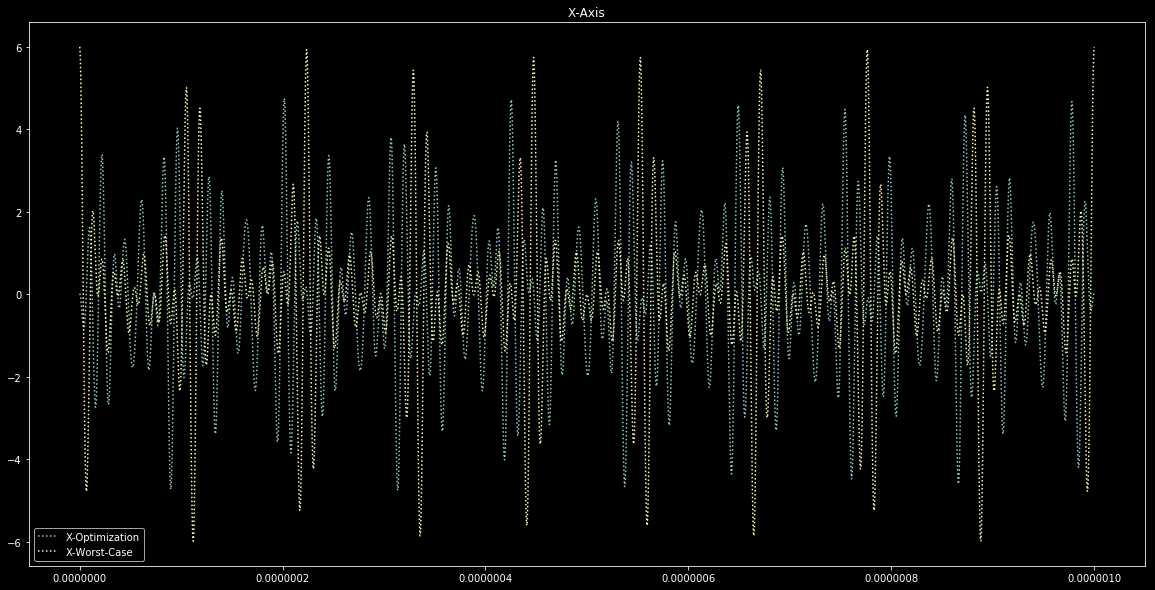

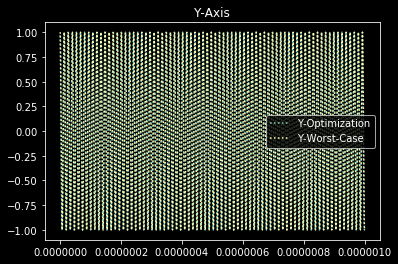

In [342]:
figure(figsize=(20,10))
xpts, yptsx_std, yptsy_std = AH.maximizeAomPerformance(49, 74.5, 9, 6, 1, iterations=10, optimizeBiases=False, metric='std' );

xFreqs [49, 58, 67, 76, 85, 94]
xAmps [ 1.  1.  1.  1.  1.  1.]
X-Phases [ 3.28995931  0.05220619  0.76872705  5.15071745  0.64871604  0.07889941]
yFreqs [74.5]
yAmps [ 1.]
Y-Phases [ 0.15755875]


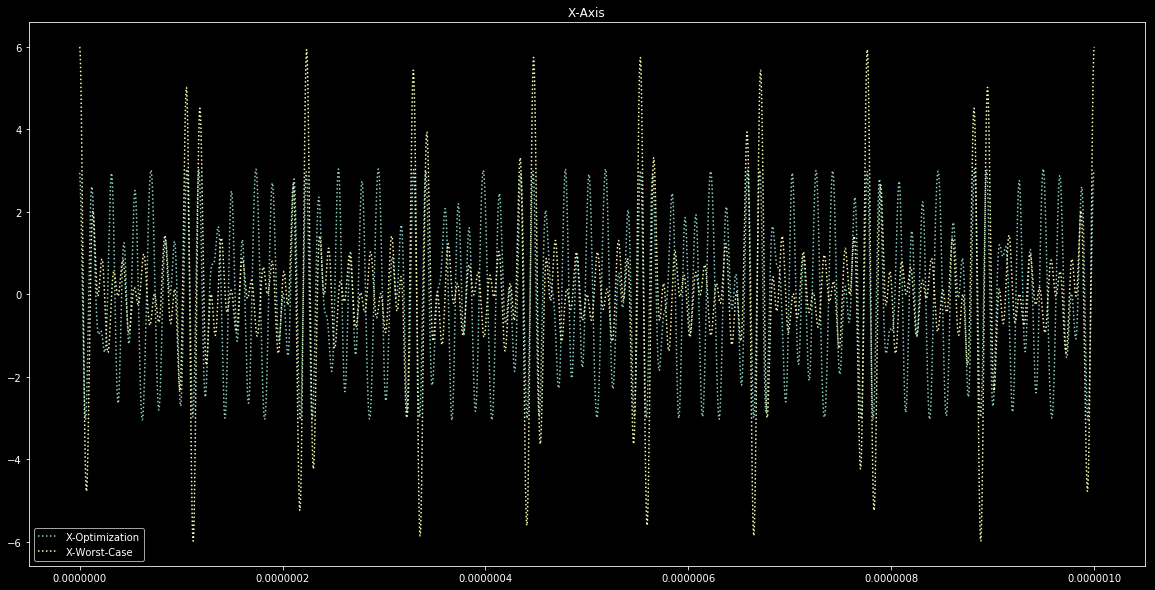

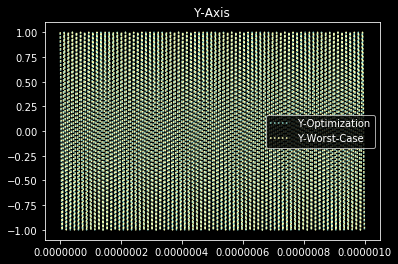

In [347]:
figure(figsize=(20,10))
xpts, yptsx_s, yptsy_s = AH.maximizeAomPerformance(49, 74.5, 9, 6, 1, iterations=10, optimizeBiases=False, paperGuess=False );

xFreqs [49, 58, 67, 76, 85, 94]
xAmps [ 1.  1.  1.  1.  1.  1.]
X-Phases [ 0.90851773  0.33837969  2.68362265  4.59752569  6.05293056  4.15658488]
yFreqs [74.5]
yAmps [ 1.]
Y-Phases [ 0.00549805]


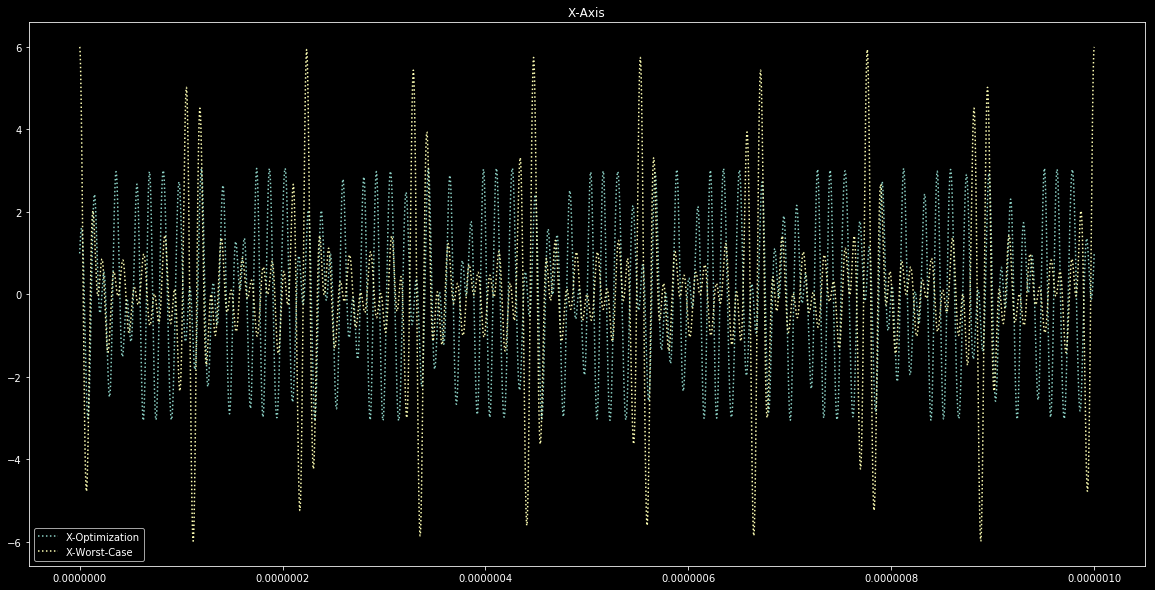

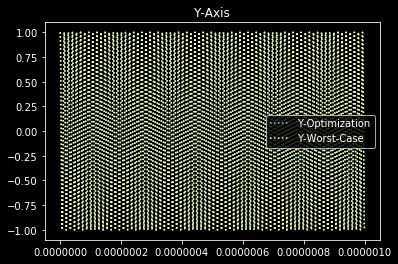

In [333]:
figure(figsize=(20,10))
xpts, yptsx, yptsy = AH.maximizeAomPerformance(49, 74.5, 9, 6, 1, iterations=10, optimizeBiases=False );

In [334]:
ypaper = np.zeros(len(xpts))
for i, val in enumerate([52e6,61e6,70e6,79e6,88e6,97e6]):
    ypaper += np.cos(2*np.pi*val * xpts + np.pi*i**2/6 % np.pi)

In [335]:
y_worst = np.zeros(len(xpts))
for i, val in enumerate([52e6,61e6,70e6,79e6,88e6,97e6]):
    y_worst += np.cos(2*np.pi*val * xpts)

In [313]:
import plotly.offline as pltly
import plotly.graph_objs as go
pltly.init_notebook_mode(connected=True)

In [352]:
layout = go.Layout( title='Optimizing AOM RF', xaxis=dict( title='Time (s)' ), yaxis=dict( title='Voltage' ))

In [353]:
data = [go.Scatter(x=xpts, y=y, name=lab)
        for y,lab in zip([yptsx_s, yptsx, yptsx_std, ypaper, y_worst], ['Minimize-Max(Volts), stupid-guess','Minimize-Max(Volts), paper-guess', 'Minimize-Std(Volts), paper-guess', 'Paper', 'Worst-Case'])]
fig = go.Figure(data=data, layout=layout)
pltly.plot(fig, filename='RF-optimizations')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `RF-optimizations` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Mark-Brown\\Documents\\Analysis-Code\\RF-optimizations.html'

## 

In [356]:
data = AH.loadCompoundBasler('AceData_6x1.txt');

In [357]:
avgData = np.zeros((data.shape[1], data.shape[2]))
for pic in data:
    avgData += pic
avgData /= data.shape[0]

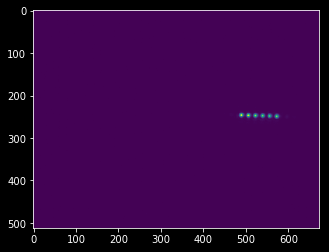

In [358]:
imshow(avgData)
savefig('AceData_6x1.png')

### % in main tweezers

0.880102222222


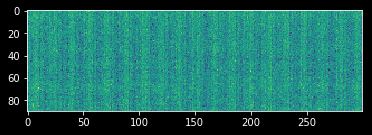

In [359]:
print(np.mean(avgData[10:100,:300]))
imshow(avgData[10:100,:300])

Efficiency: 0.886925832242


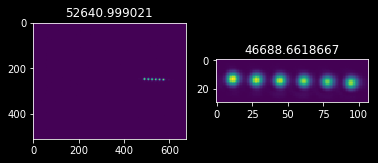

In [366]:
f, ax = subplots(1,2);
bgSub = avgData - 0.8801022222
windowData = bgSub[233:263, 478:585]
ax[0].imshow(bgSub)
ax[0].set_title(np.sum(bgSub))
ax[1].imshow(windowData)
im = ax[1].set_title(np.sum(windowData))
print('Efficiency: ' + str(np.sum(windowData)/np.sum(bgSub)))

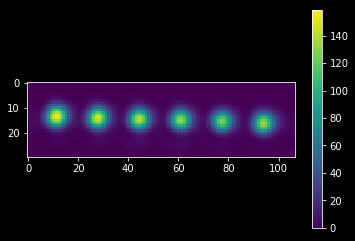

In [367]:
imshow(windowData)
colorbar()

### Fitting main tweezers

In [194]:
from fitters import arb_2d_gaussian_sum
from numpy import array as arr

In [376]:
x = np.arange(windowData.shape[1])
y = np.arange(windowData.shape[0])
xx, yy = np.meshgrid(x,y)
# 0 for offset
params = [0]
numInRow = 6
for i in range(6):
    params.append(135 - 30*(i%numInRow==1) + 15*(i%numInRow==2) + 20 * (int(i/numInRow)==5))
    params.append( 12 + 16.5 * (i % numInRow) - i/6 )
    params.append( 13 + 13.5 * int(i/numInRow) + 2.98*i/numInRow )
    params.append( 3 )
    params.append( 3 )
res = arb_2d_gaussian_sum.f_raw((xx,yy),  *arr(params).flatten());

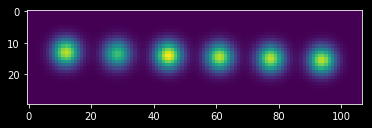

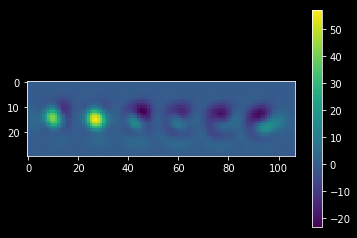

In [377]:
imshow(res)
figure()
imshow(windowData-res)
colorbar()

In [378]:
windowData = np.array(windowData, dtype='float64')

In [379]:
fitParams, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (xx, yy), windowData.ravel(), p0=params)

In [380]:
res = arb_2d_gaussian_sum.f_raw((xx,yy), *fitParams);

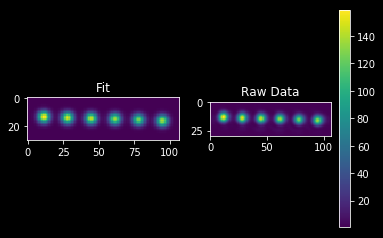

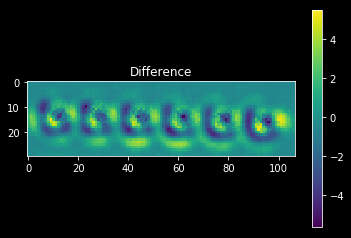

In [381]:
f, ax = subplots(1,2)
a = ax[0].imshow(res)
colorbar(a)
ax[0].set_title('Fit')
ax[1].imshow(windowData)
ax[1].set_title('Raw Data')
savefig('Fit-vs-Raw.png', dpi=200)
figure()
imshow(windowData-res)
title('Difference')
colorbar()
savefig('Difference-between-fit-and-raw.png', dpi=100)

### Results

In [389]:
size = (1,6)

In [390]:
shapedParams = np.reshape(fitParams[1:], (size[0],size[1],5))

In [391]:
amps = np.zeros(size)
sig_x = np.zeros(size)
sig_y = np.zeros(size)
for i, row in enumerate(shapedParams):
    for j, elem in enumerate(row):
        amps[i][j] = elem[0]
        sig_x[i][j] = elem[3]
        sig_y[i][j] = elem[4]

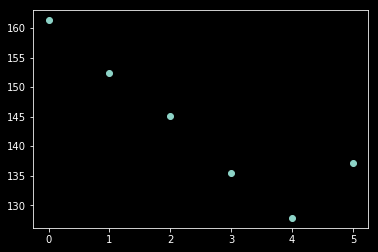

In [400]:
plot(amps[0],'o')

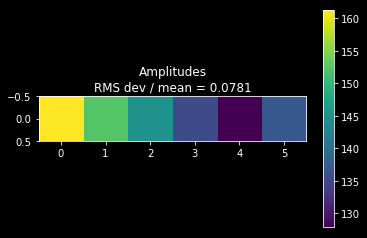

In [392]:
imshow(amps)
colorbar()
title('Amplitudes\nRMS dev / mean = ' + str(round_sig(np.std(amps)/np.mean(amps))))
savefig('Fit-Amplitudes-3x6-wide.png')

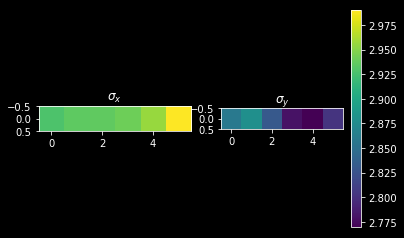

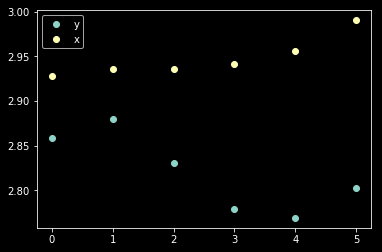

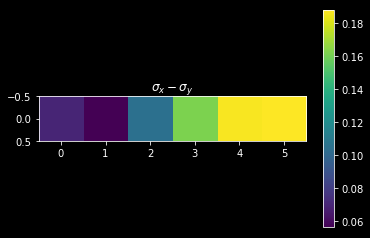

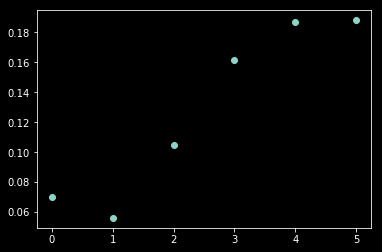

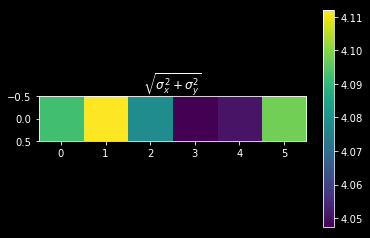

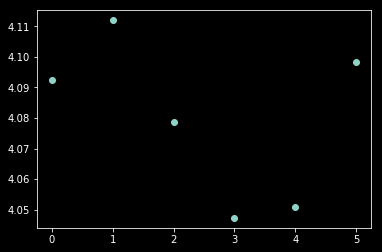

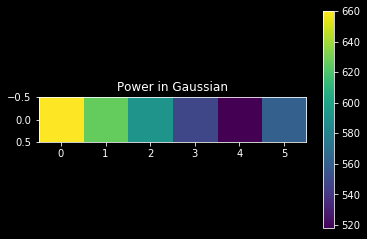

In [408]:
f, ax = subplots(1,2)
vma = np.max(list(sig_x) + list(sig_y))
vmi = np.min(list(sig_x) + list(sig_y))
a = ax[0].imshow(sig_x, vmax=vma, vmin=vmi)
colorbar(a)
ax[0].set_title(r'$\sigma_x$')
ax[1].imshow(sig_y, vmax=vma, vmin=vmi)
ax[1].set_title(r'$\sigma_y$')
savefig('Fit-Waists.png')
figure()
plot(sig_y[0],'o', label='y')
plot(sig_x[0],'o', label='x')
legend()
figure()
imshow(sig_x-sig_y)
colorbar()
title('$\sigma_x-\sigma_y$')
savefig('Waist-Difference.png')
figure()
plot(sig_x[0]-sig_y[0], 'o')
figure()
imshow(np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('$\sqrt{\sigma_x^2+\sigma_y^2}$')
savefig('rms-waist.png')
figure()
plot(np.sqrt(sig_x[0]**2+sig_y[0]**2), 'o');
figure()
imshow(amps*np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('Power in Gaussian')


# New Intraaction AOMS

### wide array (pre-proper RF filters)

In [2]:
import AnalysisHelpers as AH

In [3]:
data = AH.loadCompoundBasler('AceData-11-atoms-even.txt');

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [357]:
avgData = np.zeros((data.shape[1], data.shape[2]))
for pic in data:
    avgData += pic
avgData /= data.shape[0]

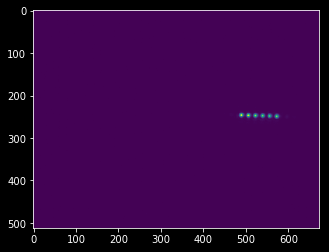

In [358]:
imshow(avgData)
savefig('AceData_6x1.png')

### % in main tweezers

0.880102222222


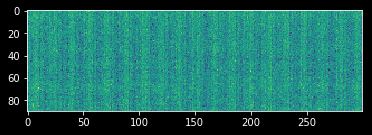

In [359]:
print(np.mean(avgData[10:100,:300]))
imshow(avgData[10:100,:300])

Efficiency: 0.886925832242


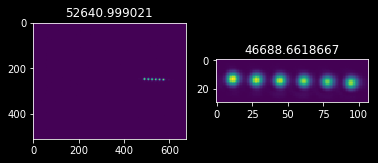

In [366]:
f, ax = subplots(1,2);
bgSub = avgData - 0.8801022222
windowData = bgSub[233:263, 478:585]
ax[0].imshow(bgSub)
ax[0].set_title(np.sum(bgSub))
ax[1].imshow(windowData)
im = ax[1].set_title(np.sum(windowData))
print('Efficiency: ' + str(np.sum(windowData)/np.sum(bgSub)))

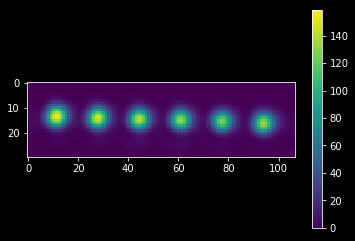

In [367]:
imshow(windowData)
colorbar()

### Fitting main tweezers

In [194]:
from fitters import arb_2d_gaussian_sum
from numpy import array as arr

In [376]:
x = np.arange(windowData.shape[1])
y = np.arange(windowData.shape[0])
xx, yy = np.meshgrid(x,y)
# 0 for offset
params = [0]
numInRow = 6
for i in range(6):
    params.append(135 - 30*(i%numInRow==1) + 15*(i%numInRow==2) + 20 * (int(i/numInRow)==5))
    params.append( 12 + 16.5 * (i % numInRow) - i/6 )
    params.append( 13 + 13.5 * int(i/numInRow) + 2.98*i/numInRow )
    params.append( 3 )
    params.append( 3 )
res = arb_2d_gaussian_sum.f_raw((xx,yy),  *arr(params).flatten());

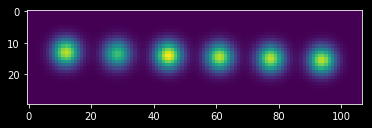

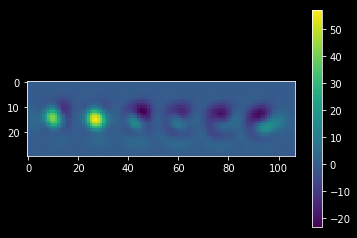

In [377]:
imshow(res)
figure()
imshow(windowData-res)
colorbar()

In [378]:
windowData = np.array(windowData, dtype='float64')

In [379]:
fitParams, cov = opt.curve_fit(arb_2d_gaussian_sum.f, (xx, yy), windowData.ravel(), p0=params)

In [380]:
res = arb_2d_gaussian_sum.f_raw((xx,yy), *fitParams);

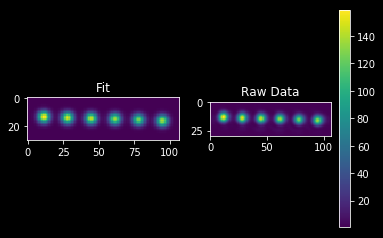

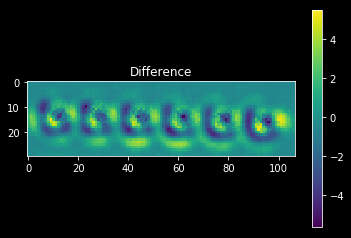

In [381]:
f, ax = subplots(1,2)
a = ax[0].imshow(res)
colorbar(a)
ax[0].set_title('Fit')
ax[1].imshow(windowData)
ax[1].set_title('Raw Data')
savefig('Fit-vs-Raw.png', dpi=200)
figure()
imshow(windowData-res)
title('Difference')
colorbar()
savefig('Difference-between-fit-and-raw.png', dpi=100)

### Results

In [389]:
size = (1,6)

In [390]:
shapedParams = np.reshape(fitParams[1:], (size[0],size[1],5))

In [391]:
amps = np.zeros(size)
sig_x = np.zeros(size)
sig_y = np.zeros(size)
for i, row in enumerate(shapedParams):
    for j, elem in enumerate(row):
        amps[i][j] = elem[0]
        sig_x[i][j] = elem[3]
        sig_y[i][j] = elem[4]

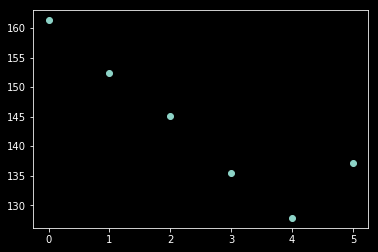

In [400]:
plot(amps[0],'o')

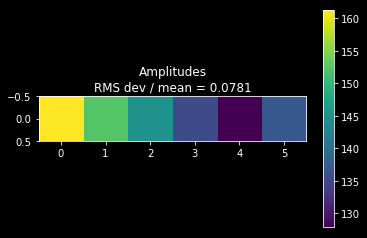

In [392]:
imshow(amps)
colorbar()
title('Amplitudes\nRMS dev / mean = ' + str(round_sig(np.std(amps)/np.mean(amps))))
savefig('Fit-Amplitudes-3x6-wide.png')

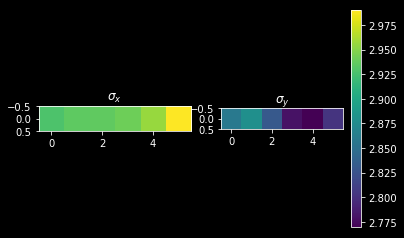

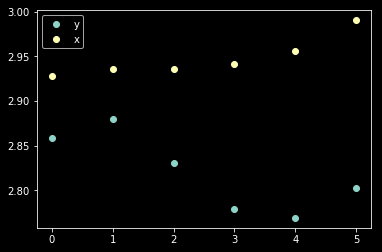

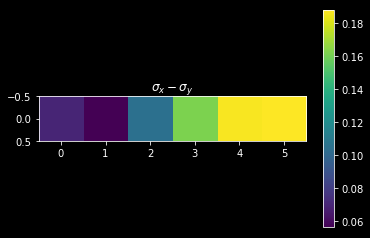

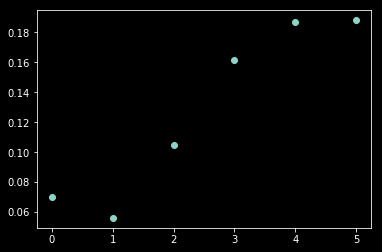

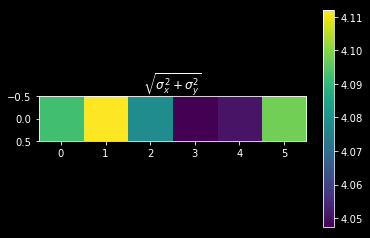

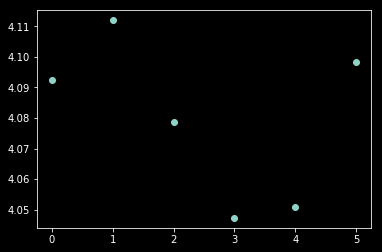

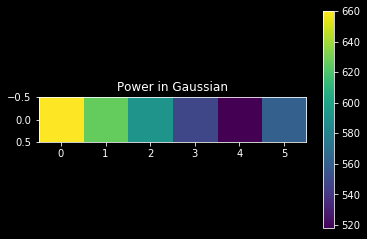

In [408]:
f, ax = subplots(1,2)
vma = np.max(list(sig_x) + list(sig_y))
vmi = np.min(list(sig_x) + list(sig_y))
a = ax[0].imshow(sig_x, vmax=vma, vmin=vmi)
colorbar(a)
ax[0].set_title(r'$\sigma_x$')
ax[1].imshow(sig_y, vmax=vma, vmin=vmi)
ax[1].set_title(r'$\sigma_y$')
savefig('Fit-Waists.png')
figure()
plot(sig_y[0],'o', label='y')
plot(sig_x[0],'o', label='x')
legend()
figure()
imshow(sig_x-sig_y)
colorbar()
title('$\sigma_x-\sigma_y$')
savefig('Waist-Difference.png')
figure()
plot(sig_x[0]-sig_y[0], 'o')
figure()
imshow(np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('$\sqrt{\sigma_x^2+\sigma_y^2}$')
savefig('rms-waist.png')
figure()
plot(np.sqrt(sig_x[0]**2+sig_y[0]**2), 'o');
figure()
imshow(amps*np.sqrt(sig_x**2+sig_y**2))
colorbar()
title('Power in Gaussian')
